In [2]:
import pandas as pd
from tabulate import tabulate

def print_null_columns_info(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Find rows with any null values
    rows_with_nulls = df[df.isnull().any(axis=1)]
    
    # Print patient ID, visit date, and count of null columns
    if not rows_with_nulls.empty:
        print(f"Rows with null values in {file_path}:")
        for index, row in rows_with_nulls.iterrows():
            null_columns_count = row.isnull().sum()
            patient_id = row['Patient ID']
            visit_date = row['Visit Date']
            print(f"Patient ID: {patient_id}, Visit Date: {visit_date}, Null Columns Count: {null_columns_count}")
    else:
        print(f"No rows with null values in {file_path}.")

# Example usage
file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\ppmi_master_dataset.csv"
print_null_columns_info(file_path)


No rows with null values in B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset.csv.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.decomposition import PCA
from lifelines import KaplanMeierFitter
import os

In [4]:
def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    
    # Specify the correct date format
    data['Visit Date'] = pd.to_datetime(data['Visit Date'], format='%Y-%m-%d')
    
    data = data.sort_values(by=['Patient ID', 'Visit Date'])
    
    # Fill missing values with the mode of each column
    data.fillna(data.mode().iloc[0], inplace=True)
    
    # Create a VisitNumber column based on the order of visits for each patient
    data['VisitNumber'] = data.groupby('Patient ID').cumcount() + 1
    
    # Define non-feature columns
    non_feature_columns = ['Patient ID', 'Visit Date', 'VisitNumber', 'EVENT_ID','Visit Class']
    
    # Extract feature columns
    features = [col for col in data.columns if col not in non_feature_columns]
    
    return data, features

In [17]:
if __name__ == "__main__":
    file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset_V2.csv"
    data,features = preprocess_data(file_path)
      
    # Save the preprocessed data to a CSV file
    data.to_csv('preprocessed_ppmi_master_dataset.csv', index=False)
    output_dir = "plots"

    # Ensure the output directory exists or create it
    os.makedirs(output_dir, exist_ok=True)

In [16]:

def plot_line_plots(data, features, pdf_filename):
    """
    Generate line plots for each feature across four visits and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create subplots for 4 visits
            
            for visit in range(1, 5):
                ax = axes[visit - 1]  # Select the current subplot
                visit_data = data[data['VisitNumber'] == visit][feature]
                ax.plot(visit_data)
                ax.set_title(f'Visit {visit}')
                ax.set_xlabel('Observation')
                ax.set_ylabel(feature)
                ax.legend([f'Visit {visit}'])
            
            fig.suptitle(f'Line Plot of {feature} Across Visits', y=1.05)
            fig.tight_layout()
            pdf.savefig()
            plt.close()

        print(f"PDF saved successfully: {pdf_filename}")

print('Working with line plot')
plot_line_plots(data, features, os.path.join(output_dir, "line_plots.pdf"))


Working with line plot
PDF saved successfully: plots\line_plots.pdf


In [6]:
def plot_scatter_plots(data, features, pdf_filename):
    """
    Generate scatter plots for pairs of features between consecutive visits and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create subplots for 3 pairs (1-2, 2-3, 3-4)

            for i, visit in enumerate(range(1, 4)):
                ax = axes[i]  # Select the current subplot
                visit_data_x = data[data['VisitNumber'] == visit][feature]
                visit_data_y = data[data['VisitNumber'] == visit + 1][feature]
                ax.scatter(visit_data_x, visit_data_y, label=f'Visit {visit}-{visit + 1}')
                ax.set_title(f'Scatter Plot of {feature} Between Visits {visit} and {visit + 1}')
                ax.set_xlabel(f'Visit {visit}')
                ax.set_ylabel(f'Visit {visit + 1}')
                ax.legend()

            fig.suptitle(f'Scatter Plots of {feature} Between Consecutive Visits', y=1.05)
            fig.tight_layout()

            # Save the figure with all three subplots to the PDF
            pdf.savefig()
            plt.close()

        print(f"PDF saved successfully: {pdf_filename}")
        
print('Working with scatter plot')
plot_scatter_plots(data, features, os.path.join(output_dir, "scatter_plots.pdf"))


Working with scatter plot
PDF saved successfully: plots\scatter_plots.pdf


In [9]:

def plot_box_plots(data, features, pdf_filename):
    """
    Generate box plots for each feature across all visits and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='VisitNumber', y=feature, data=data)
            plt.title(f'Box Plot of {feature} Across Visits')
            plt.xlabel('Visit Number')
            plt.ylabel(feature)
            pdf.savefig()
            plt.close()
        print(f"PDF saved successfully: {pdf_filename}")

print('Working with box plot')
plot_box_plots(data, features, os.path.join(output_dir, "box_plots1.pdf"))


Working with box plot
PDF saved successfully: plots\box_plots1.pdf


In [8]:
def plot_violin_plots(data, features, pdf_filename):
    """
    Generate violin plots for each feature across all visits and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            plt.figure(figsize=(10, 6))
            sns.violinplot(x='VisitNumber', y=feature, data=data)
            plt.title(f'Violin Plot of {feature} Across Visits')
            plt.xlabel('Visit Number')
            plt.ylabel(feature)
            pdf.savefig()
            plt.close()
        print(f"PDF saved successfully: {pdf_filename}")

print('Working with violin plot')
plot_violin_plots(data, features, os.path.join(output_dir, "violin_plots.pdf"))


Working with violin plot
PDF saved successfully: plots\violin_plots.pdf


In [9]:
def plot_histograms(data, features, pdf_filename):
    """
    Generate histograms for each feature across all visits and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create subplots for 4 visits
            
            for visit in range(1, 5):
                ax = axes[visit - 1]  # Select the current subplot
                visit_data = data[data['VisitNumber'] == visit][feature]
                ax.hist(visit_data, bins=20, alpha=0.5, label=f'Visit {visit}')
                ax.set_title(f'Histogram of {feature}, Visit {visit}')
                ax.set_xlabel(feature)
                ax.set_ylabel('Frequency')
                ax.legend()

            fig.suptitle(f'Histograms of {feature} Across Visits', y=1.05)
            fig.tight_layout()

            # Save the figure with all four subplots to the PDF
            pdf.savefig()
            plt.close()

        print(f"PDF saved successfully: {pdf_filename}")

print('Working with histograms')
plot_histograms(data, features, os.path.join(output_dir, "histograms.pdf"))



Working with histograms
PDF saved successfully: plots\histograms.pdf


In [ ]:
def plot_density_plots(data, features, pdf_filename):
    """
    Generate probability density function (PDF) plots for each feature across all visits and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            plt.figure(figsize=(10, 6))
            for visit in range(1, 5):
                visit_data = data[data['VisitNumber'] == visit][feature]
                sns.kdeplot(visit_data, label=f'Visit {visit}')
            plt.title(f'Probability Density Function (PDF) of {feature} Across Visits')
            plt.xlabel(feature)
            plt.ylabel('Density')
            plt.legend()
            pdf.savefig()
            plt.close()
        print(f"PDF saved successfully: {pdf_filename}")
        
print('Working with density_plots')
plot_density_plots(data, features, os.path.join(output_dir, "density_plots1.pdf"))


In [11]:
def plot_heatmaps(data, features, pdf_filename):
    """
    Generate heatmaps for selected features and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot as heatmap.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    # Compute correlation matrix
    corr_matrix = data[features].corr()

    with PdfPages(pdf_filename) as pdf:
        plt.figure(figsize=(50, 40))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix Heatmap')
        pdf.savefig()
        plt.close()
        print(f"PDF saved successfully: {pdf_filename}")
        
print('Working with heatmaps')
plot_heatmaps(data, features, os.path.join(output_dir, "heatmaps.pdf"))

Working with heatmaps
PDF saved successfully: plots\heatmaps.pdf


In [ ]:
def plot_pair_plots(data, features, pdf_filename):
    """
    Generate pair plots for selected features and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot in pair plots.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    sns.set(style="ticks")
    pair_plot_data = data.loc[:, features + ['VisitNumber']]

    with PdfPages(pdf_filename) as pdf:
        sns.pairplot(pair_plot_data, hue='VisitNumber')
        pdf.savefig()
        plt.close()
        print(f"PDF saved successfully: {pdf_filename}")
        
print('Working with pair plots')
plot_pair_plots(data, features, os.path.join(output_dir, "pair_plots.pdf"))

In [12]:
def plot_pca_biplots(data, features, pdf_filename):
    """
    Generate PCA biplots for selected features and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to use for PCA.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    pca = PCA(n_components=2)
    pca_data = data[features].dropna()
    pca_components = pca.fit_transform(pca_data)

    with PdfPages(pdf_filename) as pdf:
        plt.figure(figsize=(10, 6))
        plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['VisitNumber'], cmap='viridis')
        plt.title('PCA Biplots')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        pdf.savefig()
        plt.close()
        print(f"PDF saved successfully: {pdf_filename}")
        
print('Working with pca biplots')
plot_pca_biplots(data, features, os.path.join(output_dir, "pca_biplots.pdf"))

Working with pca biplots
PDF saved successfully: plots\pca_biplots.pdf


In [13]:
def plot_time_series_plots(data, time_col, group_col, pdf_filename):
    print("Generating time series plots for all features...")
    with PdfPages(pdf_filename) as pdf:
        features = [col for col in data.columns if col not in [time_col, group_col, 'Patient ID', 'EVENT_ID']]
        for feature in features:
            for group in data[group_col].unique():
                group_data = data[data[group_col] == group]
                plt.figure(figsize=(10, 6))
                plt.plot(group_data[time_col], group_data[feature], marker='o', linestyle='-')
                plt.title(f'Time Series Plot of {feature} for Visit {group}')
                plt.xlabel(time_col)
                plt.ylabel(feature)
                pdf.savefig()
                plt.close()
    print(f"PDF saved successfully: {pdf_filename}")

# Call the function
plot_time_series_plots(data, 'Visit Date', 'VisitNumber', os.path.join(output_dir, "time_series_plots.pdf"))


Generating time series plots for all features...
PDF saved successfully: plots\time_series_plots.pdf


In [14]:
def plot_area_plots(data, time_col, group_col, pdf_filename):
    print("Generating area plots for all features...")
    with PdfPages(pdf_filename) as pdf:
        features = [col for col in data.columns if col not in [time_col, group_col, 'Patient ID', 'EVENT_ID']]
        for feature in features:
            for group in data[group_col].unique():
                group_data = data[data[group_col] == group]
                plt.figure(figsize=(10, 6))
                plt.fill_between(group_data[time_col], group_data[feature], alpha=0.5)
                plt.plot(group_data[time_col], group_data[feature], marker='', linestyle='-')
                plt.title(f'Area Plot of {feature} for Visit {group}')
                plt.xlabel(time_col)
                plt.ylabel(feature)
                pdf.savefig()
                plt.close()
    print(f"PDF saved successfully: {pdf_filename}")

# Call the function
plot_area_plots(data, 'Visit Date', 'VisitNumber', os.path.join(output_dir, "area_plots.pdf"))


Generating area plots for all features...
PDF saved successfully: plots\area_plots.pdf


In [15]:
def plot_ridgeline_plots(data, time_col, group_col, pdf_filename):
    print("Generating ridgeline plots for all features...")
    with PdfPages(pdf_filename) as pdf:
        features = [col for col in data.columns if col not in [time_col, group_col, 'Patient ID', 'EVENT_ID']]
        for feature in features:
            plt.figure(figsize=(10, 6))
            sns.kdeplot(data=data, x=time_col, hue=group_col, fill=True)
            plt.title(f'Ridgeline Plot of {feature} Over {time_col} by {group_col}')
            plt.xlabel(time_col)
            plt.ylabel(feature)
            pdf.savefig()
            plt.close()
    print(f"PDF saved successfully: {pdf_filename}")

# Call the function
plot_ridgeline_plots(data, 'Visit Date', 'VisitNumber', os.path.join(output_dir, "ridgeline_plots.pdf"))


Generating ridgeline plots for all features...
PDF saved successfully: plots\ridgeline_plots.pdf


In [ ]:

def plot_kaplan_meier_plots(data, event_col, time_col, group_col, pdf_filename):
    """
    Generate Kaplan-Meier plots for survival analysis and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the survival data.
    - event_col (str): Column name indicating the event/censorship status.
    - time_col (str): Column name indicating the survival time.
    - group_col (str): Column name indicating the group/category.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    from lifelines import KaplanMeierFitter
    from matplotlib.backends.backend_pdf import PdfPages
    
    kmf = KaplanMeierFitter()

    with PdfPages(pdf_filename) as pdf:
        plt.figure(figsize=(10, 6))
        for group in data[group_col].unique():
            group_data = data[data[group_col] == group]
            kmf.fit(group_data[time_col], event_observed=group_data[event_col], label=group)
            kmf.plot()
        plt.title('Kaplan-Meier Survival Curves')
        plt.xlabel('Time')
        plt.ylabel('Survival Probability')
        pdf.savefig()
        plt.close()
        print(f"PDF saved successfully: {pdf_filename}")

# Ensure you pass the correct column names when calling the function
plot_kaplan_meier_plots(data, 'EVENT_ID', 'Time', 'Group', "kaplan_meier_plots.pdf")

# define patient visit class and generate processed_ppmi_master_dataset.csv file


In [7]:
import pandas as pd
import numpy as np

# Load the preprocessed data
file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\preprocessed_ppmi_master_dataset.csv"
data = pd.read_csv(file_path)

# Convert 'Visit Date' to datetime with the specified format
data['Visit Date'] = pd.to_datetime(data['Visit Date'], format='%Y-%m-%d')

# Sort data by 'Patient ID' and 'Visit Date'
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Function to calculate interval in months
def calculate_month_interval(start_date, end_date):
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

# Define classes for intervals
interval_classes = {
    (0, 4): '0 months',
    (5, 17): '5-17 months',
    (18, 30): '18-30 months',
    (31, 65): '31-65 months'
}

# Function to assign class based on interval
def assign_interval_class(interval):
    for (start, end), label in interval_classes.items():
        if start <= interval <= end:
            return label
    return 'Out of Range'

# Process each patient to calculate intervals and assign classes
def process_patient_data(patient_data):
    patient_data = patient_data.sort_values(by='Visit Date')
    first_visit_date = patient_data['Visit Date'].iloc[0]
    
    intervals = []
    for i in range(1, len(patient_data)):
        interval_months = calculate_month_interval(first_visit_date, patient_data['Visit Date'].iloc[i])
        intervals.append(interval_months)
        
        # Check interval against the required ranges
        if i == 1 and not (5 <= interval_months <= 17):
            patient_data.loc[:, 'Visit Class'] = np.nan  # Mark all rows as NaN if condition not met
            return patient_data
        elif i == 2 and not (18 <= interval_months <= 30):
            patient_data.loc[:, 'Visit Class'] = np.nan  # Mark all rows as NaN if condition not met
            return patient_data
        elif i == 3 and not (31 <= interval_months <= 65):
            patient_data.loc[:, 'Visit Class'] = np.nan  # Mark all rows as NaN if condition not met
            return patient_data
    
    # Assign visit classes if all conditions are met
    patient_data['Visit Class'] = ['0 months'] + [assign_interval_class(interval) for interval in intervals]
    return patient_data

# Apply the processing to each patient with explicit selection of grouping columns
grouped_data = data.groupby('Patient ID')
processed_data = grouped_data.apply(lambda x: process_patient_data(x)).reset_index(drop=True)

# Drop rows where 'Visit Class' is NaN (patients that did not meet interval criteria)
processed_data = processed_data.dropna(subset=['Visit Class'])

# Save the processed data to CSV
processed_file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset.csv"
processed_data.to_csv(processed_file_path, index=False)

print(f"Processed data saved successfully to {processed_file_path}")


Processed data saved successfully to B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset.csv


C:\Users\bubha\AppData\Local\Temp\ipykernel_5364\2147712011.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  processed_data = grouped_data.apply(lambda x: process_patient_data(x)).reset_index(drop=True)


# Plot density plot

In [18]:
def plot_density_plots(data, features, pdf_filename):
    """
    Generate probability density function (PDF) plots for each feature across all visit classes and save them to a PDF.

    Parameters:
    - data (DataFrame): The input DataFrame containing the dataset.
    - features (list): List of features (columns) in the dataset to plot.
    - pdf_filename (str): File name for the PDF to save the plots.
    """
    with PdfPages(pdf_filename) as pdf:
        for feature in features:
            plt.figure(figsize=(10, 6))
            for visit_class in data['Visit Class'].unique():
                visit_data = data[data['Visit Class'] == visit_class][feature]
                sns.kdeplot(visit_data, label=f'{visit_class}')
            plt.title(f'Probability Density Function (PDF) of {feature} Across Visit Classes')
            plt.xlabel(feature)
            plt.ylabel('Density')
            plt.legend()
            pdf.savefig()
            plt.close()
        print(f"PDF saved successfully: {pdf_filename}")

print('Working with density_plots')
plot_density_plots(data, features, os.path.join(output_dir, "density_plots_V2.pdf"))


Working with density_plots


C:\Users\bubha\AppData\Local\Temp\ipykernel_9940\3171413468.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(visit_data, label=f'{visit_class}')
C:\Users\bubha\AppData\Local\Temp\ipykernel_9940\3171413468.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(visit_data, label=f'{visit_class}')
C:\Users\bubha\AppData\Local\Temp\ipykernel_9940\3171413468.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(visit_data, label=f'{visit_class}')
C:\Users\bubha\AppData\Local\Temp\ipykernel_9940\3171413468.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(visit_data, label=f'{visit_class}')
C:\Users\bubha\AppData\Local\Temp\ipykernel_9940\3171413468.py:15: U

PDF saved successfully: plots\density_plots_V2.pdf


# print the patient count based on class


In [12]:
visit_class_counts = data['Visit Class'].value_counts()

# Print or display the counts
print(visit_class_counts)

Visit Class
0 months        216
5-17 months     216
18-30 months    216
31-65 months    216
Name: count, dtype: int64


# define patient visit class V2 and generate processed_ppmi_master_dataset_V2.csv file

In [9]:
import pandas as pd
import numpy as np

# Load the preprocessed data
file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\preprocessed_ppmi_master_dataset.csv"
data = pd.read_csv(file_path)

# Convert 'Visit Date' to datetime with the specified format
data['Visit Date'] = pd.to_datetime(data['Visit Date'], format='%Y-%m-%d')

# Sort data by 'Patient ID' and 'Visit Date'
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Function to calculate interval in months
def calculate_month_interval(start_date, end_date):
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

# Define classes for intervals
interval_classes = {
    (0, 4): '0 months',
    (5, 10): '5-10 months V1',
    (11, 17): '11-17 months V1',
    (18, 23): '18-23 months V2',
    (24, 30): '24-30 months V2',
    (31, 40): '31-40 months V3',
    (41, 65): '41-65 months V3'
}

# Function to assign class based on interval
def assign_interval_class(interval):
    for (start, end), label in interval_classes.items():
        if start <= interval <= end:
            return label
    return 'Out of Range'

# Process each patient to calculate intervals and assign classes
def process_patient_data(patient_data):
    patient_data = patient_data.sort_values(by='Visit Date')
    first_visit_date = patient_data['Visit Date'].iloc[0]
    
    intervals = []
    for i in range(1, len(patient_data)):
        interval_months = calculate_month_interval(first_visit_date, patient_data['Visit Date'].iloc[i])
        intervals.append(interval_months)
        
        # Check interval against the required ranges
        if i == 1 and not (5 <= interval_months <= 10 or 11 <= interval_months <= 17):
            patient_data.loc[:, 'Visit Class'] = np.nan  # Mark all rows as NaN if condition not met
            return patient_data
        elif i == 2 and not (18 <= interval_months <= 23 or 24 <= interval_months <= 30):
            patient_data.loc[:, 'Visit Class'] = np.nan  # Mark all rows as NaN if condition not met
            return patient_data
        elif i == 3 and not (31 <= interval_months <= 40 or 41 <= interval_months <= 65):
            patient_data.loc[:, 'Visit Class'] = np.nan  # Mark all rows as NaN if condition not met
            return patient_data
    
    # Assign visit classes if all conditions are met
    patient_data['Visit Class'] = ['0 months'] + [assign_interval_class(interval) for interval in intervals]
    return patient_data

# Apply the processing to each patient with explicit selection of grouping columns
grouped_data = data.groupby('Patient ID')
processed_data = grouped_data.apply(lambda x: process_patient_data(x)).reset_index(drop=True)

# Drop rows where 'Visit Class' is NaN (patients that did not meet interval criteria)
processed_data = processed_data.dropna(subset=['Visit Class'])

# Save the processed data to CSV
processed_file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset_V2.csv"
processed_data.to_csv(processed_file_path, index=False)

print(f"Processed data saved successfully to {processed_file_path}")


Processed data saved successfully to B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset_V2.csv


C:\Users\bubha\AppData\Local\Temp\ipykernel_9940\3427009541.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  processed_data = grouped_data.apply(lambda x: process_patient_data(x)).reset_index(drop=True)


# print the patient count based on class

In [19]:
processed_file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset_V2.csv"
data = pd.read_csv(processed_file_path)
visit_class_counts = data['Visit Class'].value_counts()

# Print or display the counts
print(visit_class_counts)

Visit Class
0 months           216
41-65 months V3    213
11-17 months V1    189
24-30 months V2    183
18-23 months V2     33
5-10 months V1      27
31-40 months V3      3
Name: count, dtype: int64


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the master dataset
file_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\processed_ppmi_master_dataset.csv"
master_data = pd.read_csv(file_path)

# Print the columns of the master dataset
print("Columns of the master dataset:")
print(master_data.columns)

# Columns that are not features
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'Visit Class', 'VisitNumber']

# Numerical feature columns
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]

# Categorical feature columns with encoded values
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Split dataset by visit class
visit1_data = master_data[master_data['Visit Class'] == '0 months']
visit2_data = master_data[master_data['Visit Class'] == '5-17 months']
visit3_data = master_data[master_data['Visit Class'] == '18-30 months']
visit4_data = master_data[master_data['Visit Class'] == '31-65 months']

# Find common patients across all visit classes
common_patients = set(visit1_data['Patient ID']).intersection(
    visit2_data['Patient ID'],
    visit3_data['Patient ID'],
    visit4_data['Patient ID']
)

# Filter each visit dataset to include only the common patients
visit1_data = visit1_data[visit1_data['Patient ID'].isin(common_patients)]
visit2_data = visit2_data[visit2_data['Patient ID'].isin(common_patients)]
visit3_data = visit3_data[visit3_data['Patient ID'].isin(common_patients)]
visit4_data = visit4_data[visit4_data['Patient ID'].isin(common_patients)]

# Reset index for each dataset
visit1_data.reset_index(drop=True, inplace=True)
visit2_data.reset_index(drop=True, inplace=True)
visit3_data.reset_index(drop=True, inplace=True)
visit4_data.reset_index(drop=True, inplace=True)

# Print the patient count for each dataset
print(f"Visit 1 dataset patient count: {visit1_data['Patient ID'].nunique()}")
print(f"Visit 2 dataset patient count: {visit2_data['Patient ID'].nunique()}")
print(f"Visit 3 dataset patient count: {visit3_data['Patient ID'].nunique()}")
print(f"Visit 4 dataset patient count: {visit4_data['Patient ID'].nunique()}")


Columns of the master dataset:
Index(['Patient ID', 'Visit Date', 'EVENT_ID', 'NP3SPCH', 'NP3FACXP',
       'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
       'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
       'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
       'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 'NP2SWAL',
       'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN',
       'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD',
       'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG',
       'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT',
       'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
       'Min

In [32]:
# Print the columns of the master dataset
print("Columns of the master dataset:")
print(master_data.columns)


Columns of the master dataset:
Index(['Patient ID', 'Visit Date', 'EVENT_ID', 'NP3SPCH', 'NP3FACXP',
       'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
       'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
       'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
       'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 'NP2SWAL',
       'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN',
       'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD',
       'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG',
       'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT',
       'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
       'Min

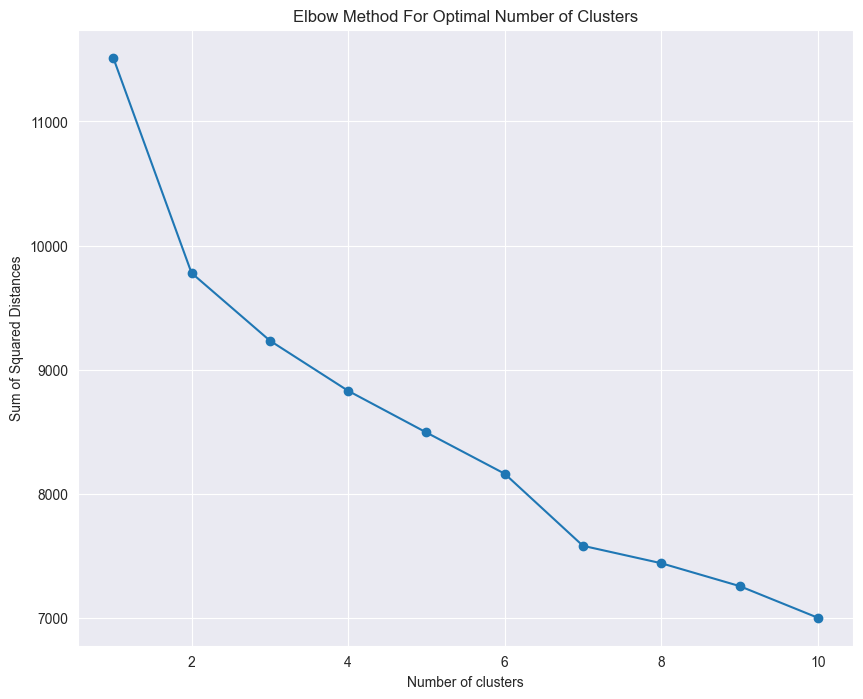

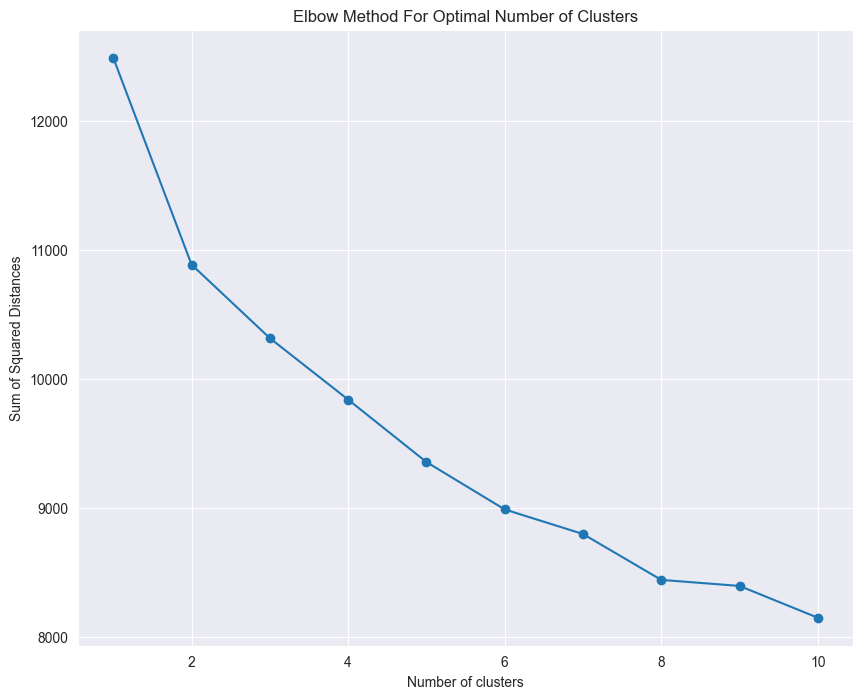

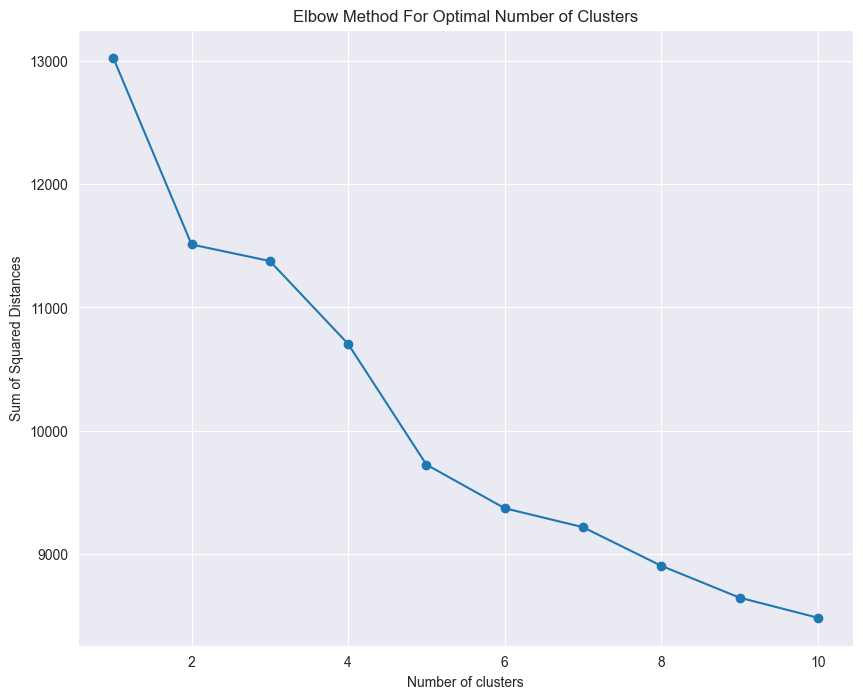

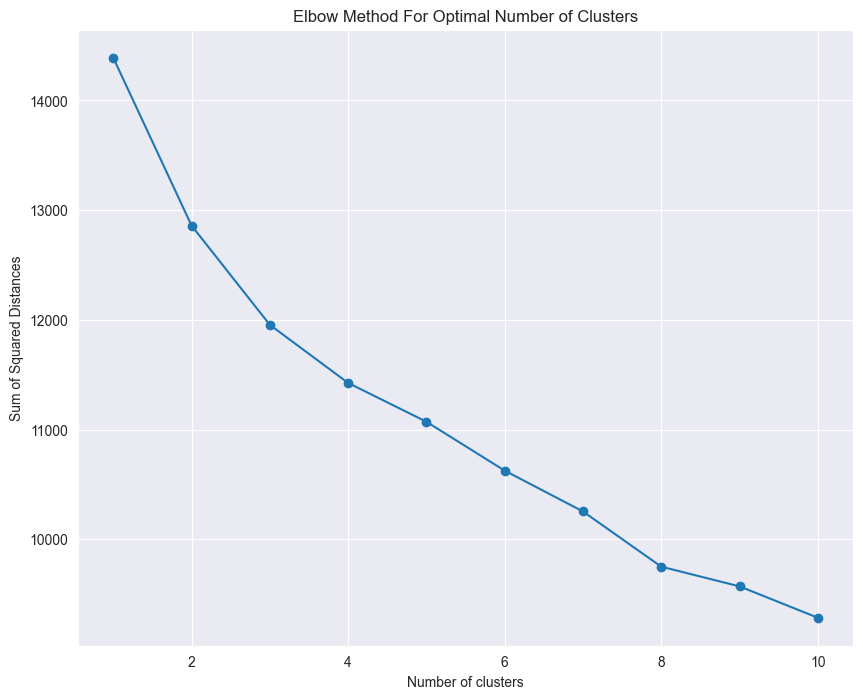

In [40]:
def determine_optimal_clusters(data, numerical_features, categorical_features):
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(data[numerical_features])  # Normalize numerical data
    
    # Combine scaled numerical data with categorical data
    combined_data = pd.DataFrame(scaled_numerical_data, columns=numerical_features)
    combined_data = pd.concat([combined_data, data[categorical_features].reset_index(drop=True)], axis=1)
    
    # Using the Elbow Method to find the optimal number of clusters
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(combined_data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.show()
    
    # Assuming the user manually determines the optimal number of clusters from the elbow plot
    optimal_k = int(input("Enter the optimal number of clusters based on the Elbow plot: "))
    
    return optimal_k

# Determine optimal clusters for each visit
optimal_k1 = determine_optimal_clusters(visit1_data, numerical_features, categorical_features)
optimal_k2 = determine_optimal_clusters(visit2_data, numerical_features, categorical_features)
optimal_k3 = determine_optimal_clusters(visit3_data, numerical_features, categorical_features)
optimal_k4 = determine_optimal_clusters(visit4_data, numerical_features, categorical_features)


In [41]:
def perform_clustering(data, numerical_features, categorical_features, n_clusters):
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(data[numerical_features])  # Normalize numerical data
    
    # Combine scaled numerical data with categorical data
    combined_data = pd.DataFrame(scaled_numerical_data, columns=numerical_features)
    combined_data = pd.concat([combined_data, data[categorical_features].reset_index(drop=True)], axis=1)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(combined_data)
    
    return kmeans

# Perform clustering for each visit
kmeans1 = perform_clustering(visit1_data, numerical_features, categorical_features, optimal_k1)
kmeans2 = perform_clustering(visit2_data, numerical_features, categorical_features, optimal_k2)
kmeans3 = perform_clustering(visit3_data, numerical_features, categorical_features, optimal_k3)
kmeans4 = perform_clustering(visit4_data, numerical_features, categorical_features, optimal_k4)


In [42]:
def print_cluster_info(data, kmeans, visit_number):
    print(f"\nVisit {visit_number} - Optimal number of clusters: {kmeans.n_clusters}")
    print(f"Cluster centers:\n{kmeans.cluster_centers_}")
    print(f"Cluster patient counts:\n{data['cluster'].value_counts()}\n")

print_cluster_info(visit1_data, kmeans1, 1)
print_cluster_info(visit2_data, kmeans2, 2)
print_cluster_info(visit3_data, kmeans3, 3)
print_cluster_info(visit4_data, kmeans4, 4)



Visit 1 - Optimal number of clusters: 6
Cluster centers:
[[-9.74971338e-01  1.96454797e+00 -9.83085012e-01 -1.05827551e+00
   3.88827814e-01 -9.74837750e-01  1.51205622e+00 -9.81720127e-01
  -9.71498296e-01 -1.02830791e+00  6.50853053e-02 -1.24052490e+00
   1.44357970e+00  1.04372220e+00 -1.09932841e+00 -9.71498296e-01
  -1.00140363e+00  5.66898955e-01 -1.10740980e+00  1.19902419e+00
  -7.18894204e-01 -1.03033250e+00  1.21421729e+00  1.29575454e+00
  -1.36072735e+00  2.30769231e-01  1.38461538e+00  3.07692308e-01
   1.23076923e+00  1.07692308e+00  4.61538462e-01  2.30769231e-01
   6.15384615e-01  1.00000000e+00  3.84615385e-01  7.69230769e-01
   3.07692308e-01  7.69230769e-01  6.92307692e-01  1.07692308e+00
   3.07692308e-01  6.15384615e-01  7.69230769e-02  5.38461538e-01
   0.00000000e+00  7.69230769e-02  6.15384615e-01  1.53846154e+00
   2.30769231e-01  3.84615385e-01  3.07692308e-01  5.38461538e-01
   6.15384615e-01  1.00000000e+00  2.30769231e-01  2.30769231e-01
   1.38777878e-17 

In [43]:
# Assuming visit1_data, visit2_data, visit3_data, and visit4_data have 'Patient ID' and 'cluster' columns
# Merge cluster labels from all visits into a single dataframe
cluster_data = pd.DataFrame({
    'Patient ID': visit1_data['Patient ID'],
    'Visit 1 Cluster': visit1_data['cluster'],
    'Visit 2 Cluster': visit2_data['cluster'],
    'Visit 3 Cluster': visit3_data['cluster'],
    'Visit 4 Cluster': visit4_data['cluster']
})

# Function to track cluster transitions for each patient
def track_cluster_transitions(cluster_data):
    transitions = []
    for idx, row in cluster_data.iterrows():
        patient_id = row['Patient ID']
        for i in range(1, 4):  # Check transitions from Visit 1 to Visit 2, Visit 2 to Visit 3, Visit 3 to Visit 4
            current_cluster = row[f'Visit {i} Cluster']
            next_cluster = row[f'Visit {i+1} Cluster']
            if current_cluster != next_cluster:
                transitions.append({
                    'Patient ID': patient_id,
                    'From Visit': i,
                    'To Visit': i + 1,
                    'From Cluster': current_cluster,
                    'To Cluster': next_cluster
                })
    transitions_df = pd.DataFrame(transitions)
    return transitions_df

# Track cluster transitions
cluster_transitions = track_cluster_transitions(cluster_data)

# Print the cluster transitions dataframe
print("Cluster Transitions:")
print(cluster_transitions)


Cluster Transitions:
     Patient ID  From Visit  To Visit  From Cluster  To Cluster
0          3010           1         2             5           3
1          3010           2         3             3           2
2          3010           3         4             2           3
3          3012           1         2             4           1
4          3012           2         3             1           2
..          ...         ...       ...           ...         ...
543        4117           3         4             1           4
544        4123           1         2             4           0
545        4123           2         3             0           1
546        4126           1         2             3           4
547        4126           3         4             4           3

[548 rows x 5 columns]


Selected features for 25% of importance:
['Circularity', 'PA_ratio', 'Extent', 'Minor axis length', 'gabor_energy', 'gabor_entropy', 'Solidity', 'Standard Deviation', 'Major axis length']

Selected features for 50% of importance:
['Circularity', 'PA_ratio', 'Extent', 'Minor axis length', 'gabor_energy', 'gabor_entropy', 'Solidity', 'Standard Deviation', 'Major axis length', 'energy', 'correlation', 'Shannon_Entropy', 'brightness', 'homogeneity', 'Area', 'dissimilarity', 'FilledArea', 'lbp_energy', 'contrast', 'Kurtosis', 'Mean']

Selected features for 75% of importance:
['Circularity', 'PA_ratio', 'Extent', 'Minor axis length', 'gabor_energy', 'gabor_entropy', 'Solidity', 'Standard Deviation', 'Major axis length', 'energy', 'correlation', 'Shannon_Entropy', 'brightness', 'homogeneity', 'Area', 'dissimilarity', 'FilledArea', 'lbp_energy', 'contrast', 'Kurtosis', 'Mean', 'ConvexArea', 'EquivDiameter', 'Skewness', 'lbp_entropy', 'NP1SLPN', 'NP3TTAPL', 'NHY', 'NP3RTCON', 'NP1SLPD', 'NP2TUR

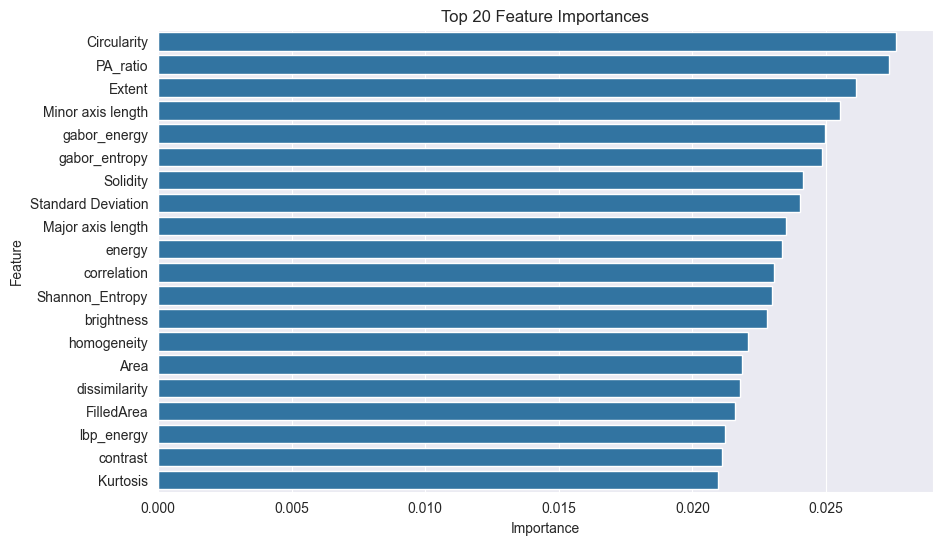

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson\'s/src/mahbub/processed_ppmi_master_dataset.csv')

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'Visit Class', 'VisitNumber']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Normalize the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Prepare the data
X = data[numerical_features + categorical_features]
y = data['Visit Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe of feature importances with corresponding column names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Calculate cumulative sum of importance to determine feature selection thresholds
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

# Determine feature selection thresholds based on percentages (100%, 75%, 50%, 25%)
total_importance = importance_df['Importance'].sum()
thresholds = [0.25, 0.5, 0.75, 1.0]
selected_features = {}

for threshold in thresholds:
    selected_features[f'{int(threshold*100)}%'] = importance_df[importance_df['Cumulative Importance'] <= threshold*total_importance]['Feature'].tolist()

# Print or visualize selected features for each threshold
for key, value in selected_features.items():
    print(f"Selected features for {key} of importance:")
    print(value)
    print()

# Optional: Plotting feature importances (requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Top 20 features
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Results for RandomForest:
  100% of importance:
    Accuracy: 0.3063583815028902
    Selected features: ['Circularity', 'PA_ratio', 'Extent', 'Minor axis length', 'gabor_energy', 'gabor_entropy', 'Solidity', 'Standard Deviation', 'Major axis length', 'energy', 'correlation', 'Shannon_Entropy', 'brightness', 'homogeneity', 'Area', 'dissimilarity', 'FilledArea', 'lbp_energy', 'contrast', 'Kurtosis', 'Mean', 'ConvexArea', 'EquivDiameter', 'Skewness', 'lbp_entropy', 'NP1SLPN', 'NP3TTAPL', 'NHY', 'NP3RTCON', 'NP1SLPD', 'NP2TURN', 'NP1CNST', 'NP3PTRMR', 'NP2TRMR', 'NP3RTALU', 'NP3TTAPR', 'NP3HMOVL', 'NP1URIN', 'NP3FTAPR', 'NP2HWRT', 'NP3PRSPL', 'NP1PAIN', 'NP3BRADY', 'NP3POSTR', 'NP3RIGN', 'NP2SPCH', 'NP3LGAGL', 'NP1FATG', 'NP2SALV', 'NP3FTAPL', 'NP3PRSPR', 'NP3HMOVR', 'NP2HOBB', 'NP3RIGLL', 'NP3RIGRL', 'NP3RIGRU', 'NP3LGAGR', 'NP3RIGLU', 'NP3GAIT', 'NP3RTARU', 'NP2RISE', 'NP3FACXP', 'NP3SPCH', 'NP3KTRMR', 'NP2DRES', 'NP2SWAL', 'NP1LTHD', 'NP1COG', 'NP2WALK', 'NP2EAT', 'NP1ANXS', 'NP3PTRML',

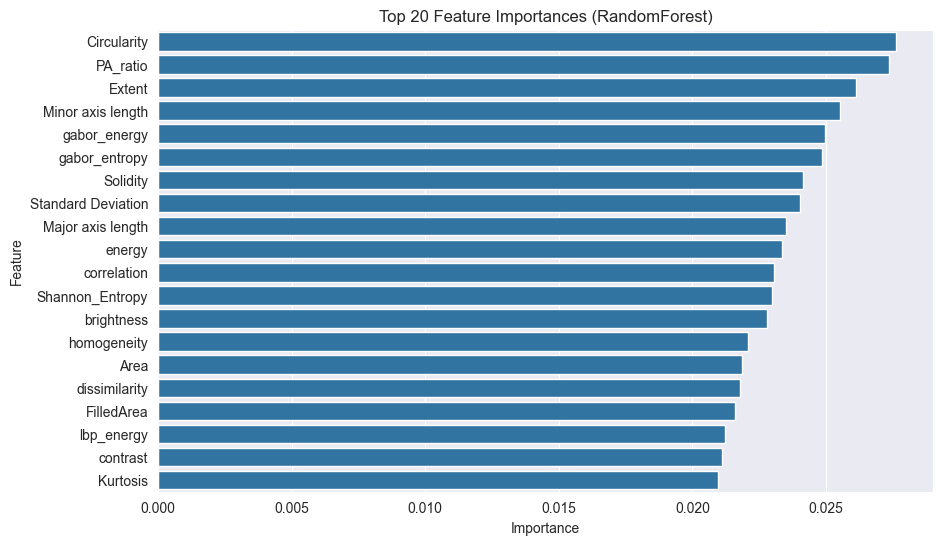

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson\'s/src/mahbub/processed_ppmi_master_dataset.csv')

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'Visit Class', 'VisitNumber']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Normalize the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Prepare the data
X = data[numerical_features + categorical_features]
y = data['Visit Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}

# Function to get feature importances
def get_feature_importances(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model.feature_importances_

# Function to evaluate models on different feature sets
def evaluate_models(models, X_train, X_test, y_train, y_test, thresholds):
    results = {}
    for name, model in models.items():
        importances = get_feature_importances(model, X_train, y_train)
        importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

        results[name] = {}
        for threshold in thresholds:
            selected_features = importance_df[importance_df['Cumulative Importance'] <= threshold]['Feature'].tolist()
            model.fit(X_train[selected_features], y_train)
            y_pred = model.predict(X_test[selected_features])
            accuracy = accuracy_score(y_test, y_pred)
            results[name][f'{int(threshold * 100)}%'] = {
                'accuracy': accuracy,
                'features': selected_features
            }
    return results

# Define thresholds for feature selection
thresholds = [1.0, 0.75, 0.5, 0.25]

# Evaluate models
results = evaluate_models(models, X_train, X_test, y_train, y_test, thresholds)

# Print results
for model_name, model_results in results.items():
    print(f"Results for {model_name}:")
    for threshold, result in model_results.items():
        print(f"  {threshold} of importance:")
        print(f"    Accuracy: {result['accuracy']}")
        print(f"    Selected features: {result['features']}")
        print()

# Optional: Plotting feature importances for the RandomForest model (top 20 features)
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': get_feature_importances(models['RandomForest'], X_train, y_train)})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Top 20 features
plt.title('Top 20 Feature Importances (RandomForest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'VisitNumber']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Normalize the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# One-hot encode the target variable (Visit Class)
data = pd.get_dummies(data, columns=['Visit Class'], drop_first=False)

# Function to convert the dataframe into sequences
def create_sequences(data, non_feature_columns, target_columns):
    data = data.sort_values(by=['Patient ID', 'VisitNumber'])
    sequences = []
    targets = []
    grouped = data.groupby('Patient ID')
    for patient_id, group in grouped:
        # Exclude non-feature and target columns
        sequence = group.drop(non_feature_columns + target_columns, axis=1).values
        # Get the target sequence (last visit class one-hot encoded)
        target = group[target_columns].values[-1]
        sequences.append(sequence)
        targets.append(target)
    return sequences, targets

# Get updated list of target columns after one-hot encoding
target_columns = list(data.filter(regex='Visit Class').columns)

# Create sequences
sequences, targets = create_sequences(data, non_feature_columns, target_columns)

# Pad sequences to have the same length
max_sequence_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_sequence_length, dtype='float32', padding='post')
y = np.array(targets)

# Convert targets to categorical
# Ensure that y has the appropriate shape for categorical data
y = np.array(y).reshape(-1, len(target_columns))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
def create_lstm_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define RNN model
def create_rnn_model(input_shape, output_shape):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(50))
    model.add(Dropout(0.2))
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]), len(target_columns))
rnn_model = create_rnn_model((X_train.shape[1], X_train.shape[2]), len(target_columns))

# Train models
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {lstm_loss}")
print(f"LSTM Test Accuracy: {lstm_accuracy}")

# Evaluate RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"RNN Test Loss: {rnn_loss}")
print(f"RNN Test Accuracy: {rnn_accuracy}")


Epoch 1/10


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7041 - loss: 1.2210 - val_accuracy: 1.0000 - val_loss: 0.8132
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.7499 - val_accuracy: 1.0000 - val_loss: 0.3792
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.3614 - val_accuracy: 1.0000 - val_loss: 0.1194
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1191 - val_accuracy: 1.0000 - val_loss: 0.0313
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 9/10
5/5 ━━━

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Separate non-feature columns, numerical features, and categorical features
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'VisitNumber','Visit Class']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Extract features
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

# Normalize numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Ensure categorical features are encoded properly (if not already)
categorical_data_encoded = categorical_data.apply(pd.to_numeric)

# Combine features back into a single dataset for HMM
processed_data = np.hstack((numerical_data_scaled, categorical_data_encoded))

# Define and train the HMM
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)
model.fit(processed_data)

# Predict hidden states
hidden_states = model.predict(processed_data)

# Add hidden states to the original dataframe
data['Hidden_State'] = hidden_states


In [8]:
data

,Patient ID,Visit Date,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy,VisitNumber,Visit Class,Hidden_State
0,3010,2011-07-13,BL,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468,1,0 months,1
1,3010,2012-06-26,V04,1.0,2.0,1.0,0.0,2.0,0.0,0.0,...,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167,2,5-17 months,0
2,3010,2013-07-17,V06,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722,3,18-30 months,0
3,3010,2015-06-26,V10,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195,4,31-65 months,4
4,3012,2011-10-11,SC,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686,1,0 months,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,4123,2017-03-01,V10,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,1.713302,0.971745,20.641646,953.635778,0.989083,0.979675,0.107821,4,31-65 months,2
860,4126,2013-03-07,V01,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,1.763254,0.976939,17.137963,761.007928,0.990175,0.982297,0.091230,1,0 months,0
861,4126,2014-04-24,V04,1.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.521967,0.977298,17.823609,755.169460,0.996123,0.989590,0.059155,2,5-17 months,0
862,4126,2015-04-15,V06,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.703124,0.977285,18.181537,784.740034,0.995052,0.987884,0.069876,3,18-30 months,0


In [10]:
# Sort data by Patient ID and Visit Date to ensure correct sequence
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Extract transitions for each patient
patient_transitions = data.groupby('Patient ID')['Hidden_State'].apply(list)

# Print the progression from the first visit to the second visit for each patient
for patient_id, transitions in patient_transitions.items():
    if len(transitions) > 1:
        print(f"Patient {patient_id} progression from first to second visit: {transitions[0]} -> {transitions[1]}")


Patient 3010 progression from first to second visit: 1 -> 0
Patient 3012 progression from first to second visit: 0 -> 4
Patient 3020 progression from first to second visit: 2 -> 4
Patient 3028 progression from first to second visit: 1 -> 0
Patient 3051 progression from first to second visit: 0 -> 0
Patient 3052 progression from first to second visit: 2 -> 0
Patient 3054 progression from first to second visit: 0 -> 4
Patient 3056 progression from first to second visit: 1 -> 1
Patient 3058 progression from first to second visit: 2 -> 4
Patient 3059 progression from first to second visit: 0 -> 4
Patient 3060 progression from first to second visit: 1 -> 0
Patient 3061 progression from first to second visit: 0 -> 0
Patient 3062 progression from first to second visit: 2 -> 0
Patient 3066 progression from first to second visit: 1 -> 1
Patient 3067 progression from first to second visit: 2 -> 0
Patient 3068 progression from first to second visit: 0 -> 4
Patient 3077 progression from first to s

In [14]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Define numerical and categorical features
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]

categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Normalize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Prepare numerical data
processed_data_numerical = data[numerical_features].values

# Categorical data is already encoded, so use it as is
processed_data_categorical = data[categorical_features].values

# Concatenate numerical and categorical data
processed_data = np.concatenate((processed_data_numerical, processed_data_categorical), axis=1)

# Range of states to evaluate
n_states = range(2, 12)  # Evaluate HMMs with 2 to 9 states

# List to store models and their likelihoods
models = []
likelihoods = []

# Fit Gaussian HMMs with different number of states
for n in n_states:
    model = GaussianHMM(n_components=n, covariance_type='diag', n_iter=1000)
    try:
        model.fit(processed_data)
        models.append(model)
        likelihoods.append(model.score(processed_data))
        print(f"Model converged for {n} states.")
    except Exception as e:
        print(f"Model did not converge for {n} states: {e}")

# Calculate AIC and BIC scores
aic_scores = [model.aic(processed_data) for model in models]
bic_scores = [model.bic(processed_data) for model in models]

# Determine the optimal number of states based on AIC and BIC
optimal_n_states_aic = n_states[np.argmin(aic_scores)]
optimal_n_states_bic = n_states[np.argmin(bic_scores)]

print(f"Optimal number of states based on AIC: {optimal_n_states_aic}")
print(f"Optimal number of states based on BIC: {optimal_n_states_bic}")

# Train the optimal model
optimal_model = models[np.argmin(aic_scores)]  # Choose based on AIC (or BIC if preferred)
optimal_model.fit(processed_data)

# Example: Predicting states for new data (replace with your actual prediction scenario)
# new_data = pd.read_csv('new_data.csv')  # Load your new data
# new_processed_data_numerical = scaler.transform(new_data[numerical_features].values)
# new_processed_data_categorical = new_data[categorical_features].values
# new_processed_data = np.concatenate((new_processed_data_numerical, new_processed_data_categorical), axis=1)
# predicted_states = optimal_model.predict(new_processed_data)

# Example: More detailed analysis or visualization
# Replace with your own analysis or visualization code



Model converged for 2 states.
Model converged for 3 states.
Model converged for 4 states.
Model converged for 5 states.
Model converged for 6 states.


Model is not converging.  Current: -56158.222188087326 is not greater than -56158.212720204. Delta is -0.009467883326578885


Model converged for 7 states.
Model converged for 8 states.
Model converged for 9 states.
Model converged for 10 states.


Model is not converging.  Current: -51427.220388425994 is not greater than -51427.217215701574. Delta is -0.0031727244204375893
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Model converged for 11 states.
Optimal number of states based on AIC: 10
Optimal number of states based on BIC: 10


Model is not converging.  Current: -51160.89301462993 is not greater than -51160.69467879517. Delta is -0.1983358347642934


GaussianHMM(n_components=10, n_iter=1000)

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Separate non-feature columns, numerical features, and categorical features
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'VisitNumber']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Extract features
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

# Normalize numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Ensure categorical features are encoded properly (if not already)
categorical_data_encoded = categorical_data.apply(pd.to_numeric)

# Combine features back into a single dataset for HMM
processed_data = np.hstack((numerical_data_scaled, categorical_data_encoded))


In [26]:
def create_constrained_transition_matrix(n_states):
    transition_matrix = np.zeros((n_states, n_states))

    for i in range(n_states):
        for j in range(i, n_states):
            transition_matrix[i, j] = 1.0 / (n_states - i)

    return transition_matrix

n_states = 10  # Number of states representing the severity levels from 0 to 5
constrained_transition_matrix = create_constrained_transition_matrix(n_states)


In [28]:
# Define and train the HMM with the custom transition matrix
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
model.startprob_ = np.ones(n_states) / n_states
model.transmat_ = constrained_transition_matrix

# Fit the HMM on the processed data
model.fit(processed_data)

# Predict hidden states
hidden_states = model.predict(processed_data)

# Add hidden states to the original dataframe
data['Hidden_State'] = hidden_states


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


In [29]:
data

,Patient ID,Visit Date,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy,VisitNumber,Visit Class,Hidden_State
0,3010,2011-07-13,BL,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468,1,0 months,3
1,3010,2012-06-26,V04,1.0,2.0,1.0,0.0,2.0,0.0,0.0,...,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167,2,5-17 months,1
2,3010,2013-07-17,V06,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722,3,18-30 months,8
3,3010,2015-06-26,V10,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195,4,31-65 months,3
4,3012,2011-10-11,SC,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686,1,0 months,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,4123,2017-03-01,V10,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,1.713302,0.971745,20.641646,953.635778,0.989083,0.979675,0.107821,4,31-65 months,5
860,4126,2013-03-07,V01,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,1.763254,0.976939,17.137963,761.007928,0.990175,0.982297,0.091230,1,0 months,5
861,4126,2014-04-24,V04,1.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.521967,0.977298,17.823609,755.169460,0.996123,0.989590,0.059155,2,5-17 months,5
862,4126,2015-04-15,V06,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.703124,0.977285,18.181537,784.740034,0.995052,0.987884,0.069876,3,18-30 months,5


In [30]:
# Sort data by Patient ID and Visit Date to ensure correct sequence
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Extract transitions for each patient
patient_transitions = data.groupby('Patient ID')['Hidden_State'].apply(list)

# Print the progression from the first visit to the second visit for each patient
for patient_id, transitions in patient_transitions.items():
    if len(transitions) > 1:
        print(f"Patient {patient_id} progression from first to second visit: {transitions[0]} -> {transitions[1]}")


Patient 3010 progression from first to second visit: 3 -> 1
Patient 3012 progression from first to second visit: 6 -> 6
Patient 3020 progression from first to second visit: 5 -> 5
Patient 3028 progression from first to second visit: 8 -> 4
Patient 3051 progression from first to second visit: 6 -> 6
Patient 3052 progression from first to second visit: 5 -> 6
Patient 3054 progression from first to second visit: 6 -> 4
Patient 3056 progression from first to second visit: 6 -> 8
Patient 3058 progression from first to second visit: 9 -> 8
Patient 3059 progression from first to second visit: 8 -> 4
Patient 3060 progression from first to second visit: 6 -> 6
Patient 3061 progression from first to second visit: 6 -> 6
Patient 3062 progression from first to second visit: 1 -> 6
Patient 3066 progression from first to second visit: 1 -> 8
Patient 3067 progression from first to second visit: 9 -> 6
Patient 3068 progression from first to second visit: 8 -> 4
Patient 3077 progression from first to s

In [24]:
patient_transitions

Patient ID
3010    [4, 0, 1, 0]
3012    [1, 1, 0, 0]
3020    [5, 0, 0, 0]
3028    [4, 1, 4, 1]
3051    [6, 6, 6, 1]
            ...     
4110    [1, 1, 1, 1]
4111    [1, 1, 1, 1]
4117    [6, 6, 6, 6]
4123    [6, 6, 3, 5]
4126    [5, 5, 5, 2]
Name: Hidden_State, Length: 216, dtype: object

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Separate non-feature columns, numerical features, and categorical features
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'VisitNumber','Visit Class']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Extract features
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

# Normalize numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Ensure categorical features are encoded properly (if not already)
categorical_data_encoded = categorical_data.apply(pd.to_numeric)

# Combine features back into a single dataset for HMM
processed_data = np.hstack((numerical_data_scaled, categorical_data_encoded))

def create_constrained_transition_matrix(n_states):
    transition_matrix = np.zeros((n_states, n_states))

    for i in range(n_states):
        for j in range(i, n_states):
            if j >= i:
                transition_matrix[i, j] = 1.0 / (n_states - i)
    
    return transition_matrix

n_states = 10  # Number of states representing the severity levels from 0 to 5
constrained_transition_matrix = create_constrained_transition_matrix(n_states)

# Define and train the HMM with the custom transition matrix
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
model.startprob_ = np.ones(n_states) / n_states
model.transmat_ = constrained_transition_matrix

# Fit the HMM on the processed data
model.fit(processed_data)

# Predict hidden states
hidden_states = model.predict(processed_data)

# Add hidden states to the original dataframe
data['Hidden_State'] = hidden_states

# Sort data by Patient ID and Visit Date to ensure correct sequence
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Extract transitions for each patient
patient_transitions = data.groupby('Patient ID')['Hidden_State'].apply(list)

# Print the progression from the first visit to the second visit for each patient
for patient_id, transitions in patient_transitions.items():
    if len(transitions) > 1:
        print(f"Patient {patient_id} progression from first to second visit: {transitions[0]} -> {transitions[1]}")



Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Patient 3010 progression from first to second visit: 6 -> 3
Patient 3012 progression from first to second visit: 2 -> 0
Patient 3020 progression from first to second visit: 4 -> 9
Patient 3028 progression from first to second visit: 6 -> 0
Patient 3051 progression from first to second visit: 2 -> 2
Patient 3052 progression from first to second visit: 4 -> 2
Patient 3054 progression from first to second visit: 2 -> 4
Patient 3056 progression from first to second visit: 0 -> 0
Patient 3058 progression from first to second visit: 4 -> 6
Patient 3059 progression from first to second visit: 6 -> 4
Patient 3060 progression from first to second visit: 1 -> 2
Patient 3061 progression from first to second visit: 2 -> 2
Patient 3062 progression from first to second visit: 4 -> 1
Patient 3066 progression from first to second visit: 4 -> 3
Patient 3067 progression from first to second visit: 4 -> 2
Patient 3068 progression from first to second visit: 0 -> 0
Patient 3077 progression from first to s

In [42]:
data

,Patient ID,Visit Date,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy,VisitNumber,Visit Class,Hidden_State
0,3010,2011-07-13,BL,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468,1,0 months,6
1,3010,2012-06-26,V04,1.0,2.0,1.0,0.0,2.0,0.0,0.0,...,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167,2,5-17 months,3
2,3010,2013-07-17,V06,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722,3,18-30 months,0
3,3010,2015-06-26,V10,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195,4,31-65 months,3
4,3012,2011-10-11,SC,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686,1,0 months,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,4123,2017-03-01,V10,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,1.713302,0.971745,20.641646,953.635778,0.989083,0.979675,0.107821,4,31-65 months,4
860,4126,2013-03-07,V01,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,1.763254,0.976939,17.137963,761.007928,0.990175,0.982297,0.091230,1,0 months,9
861,4126,2014-04-24,V04,1.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.521967,0.977298,17.823609,755.169460,0.996123,0.989590,0.059155,2,5-17 months,2
862,4126,2015-04-15,V06,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.703124,0.977285,18.181537,784.740034,0.995052,0.987884,0.069876,3,18-30 months,2


In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Separate non-feature columns, numerical features, and categorical features
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'VisitNumber']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Extract features
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

# Normalize numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Ensure categorical features are encoded properly (if not already)
categorical_data_encoded = categorical_data.apply(pd.to_numeric)

# Separate numerical and categorical data for HMMs
processed_numerical_data = numerical_data_scaled
processed_categorical_data = categorical_data_encoded.values  # Use .values to get numpy array

def create_constrained_transition_matrix(n_states):
    transition_matrix = np.zeros((n_states, n_states))

    for i in range(n_states):
        for j in range(i, n_states):
            if j >= i:
                transition_matrix[i, j] = 1.0 / (n_states - i)
    
    return transition_matrix

n_states = 10  # Number of states representing the severity levels from 0 to 5
constrained_transition_matrix = create_constrained_transition_matrix(n_states)

# Define and train the HMM for numerical features
numerical_model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
numerical_model.startprob_ = np.ones(n_states) / n_states
numerical_model.transmat_ = constrained_transition_matrix
numerical_model.fit(processed_numerical_data)
numerical_hidden_states = numerical_model.predict(processed_numerical_data)

# Define and train the HMM for categorical features
categorical_model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
categorical_model.startprob_ = np.ones(n_states) / n_states
categorical_model.transmat_ = constrained_transition_matrix
categorical_model.fit(processed_categorical_data)
categorical_hidden_states = categorical_model.predict(processed_categorical_data)

# Add hidden states to the original dataframe for numerical and categorical separately
data['Numerical_Hidden_State'] = numerical_hidden_states
data['Categorical_Hidden_State'] = categorical_hidden_states

# Sort data by Patient ID and Visit Date to ensure correct sequence
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Extract transitions for each patient for numerical and categorical separately
patient_numerical_transitions = data.groupby('Patient ID')['Numerical_Hidden_State'].apply(list)
patient_categorical_transitions = data.groupby('Patient ID')['Categorical_Hidden_State'].apply(list)

# Print the progression from the first visit to the second visit for each patient for numerical and categorical separately
for patient_id, transitions in patient_numerical_transitions.items():
    if len(transitions) > 1:
        print(f"Patient {patient_id} numerical progression from first to second visit: {transitions[0]} -> {transitions[1]}")

for patient_id, transitions in patient_categorical_transitions.items():
    if len(transitions) > 1:
        print(f"Patient {patient_id} categorical progression from first to second visit: {transitions[0]} -> {transitions[1]}")


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Patient 3010 numerical progression from first to second visit: 5 -> 0
Patient 3012 numerical progression from first to second visit: 6 -> 0
Patient 3020 numerical progression from first to second visit: 3 -> 8
Patient 3028 numerical progression from first to second visit: 5 -> 0
Patient 3051 numerical progression from first to second visit: 0 -> 0
Patient 3052 numerical progression from first to second visit: 3 -> 8
Patient 3054 numerical progression from first to second visit: 0 -> 8
Patient 3056 numerical progression from first to second visit: 6 -> 6
Patient 3058 numerical progression from first to second visit: 7 -> 6
Patient 3059 numerical progression from first to second visit: 6 -> 3
Patient 3060 numerical progression from first to second visit: 6 -> 0
Patient 3061 numerical progression from first to second visit: 6 -> 6
Patient 3062 numerical progression from first to second visit: 1 -> 0
Patient 3066 numerical progression from first to second visit: 8 -> 6
Patient 3067 numeric

In [44]:
patient_numerical_transitions

Patient ID
3010    [5, 0, 6, 6]
3012    [6, 0, 5, 5]
3020    [3, 8, 1, 3]
3028    [5, 0, 5, 0]
3051    [0, 0, 6, 6]
            ...     
4110    [6, 6, 3, 6]
4111    [6, 6, 6, 5]
4117    [8, 8, 6, 3]
4123    [6, 0, 8, 7]
4126    [8, 1, 1, 4]
Name: Numerical_Hidden_State, Length: 216, dtype: object

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/processed_ppmi_master_dataset.csv")

# Separate non-feature columns, numerical features, and categorical features
non_feature_columns = ['Patient ID', 'Visit Date', 'EVENT_ID', 'VisitNumber','Visit Class']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 
    'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 
    'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 
    'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 
    'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 
    'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH', 'NP2SALV', 
    'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 
    'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 
    'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 
    'NP1ANXS', 'NP1APAT', 'NP1DDS', 'CONCOHORT'
]

# Extract features
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

# Normalize numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Ensure categorical features are encoded properly (if not already)
categorical_data_encoded = categorical_data.apply(pd.to_numeric)

# Combine features back into a single dataset for HMM
processed_data = np.hstack((numerical_data_scaled, categorical_data_encoded))

def create_constrained_transition_matrix(n_states):
    transition_matrix = np.zeros((n_states, n_states))

    for i in range(n_states):
        for j in range(i, n_states):
            if j >= i:
                transition_matrix[i, j] = 1.0 / (n_states - i)
    
    return transition_matrix

n_states = 8  # Number of states representing the severity levels from 0 to 5
constrained_transition_matrix = create_constrained_transition_matrix(n_states)

# Define and train the HMM with the custom transition matrix
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
model.startprob_ = np.ones(n_states) / n_states
model.transmat_ = constrained_transition_matrix

# Fit the HMM on the processed data
model.fit(processed_data)

# Predict hidden states
hidden_states = model.predict(processed_data)

# Add hidden states to the original dataframe
data['Hidden_State'] = hidden_states

# Sort data by Patient ID and Visit Date to ensure correct sequence
data = data.sort_values(by=['Patient ID', 'Visit Date'])

# Extract transitions for each patient
patient_transitions = data.groupby('Patient ID')['Hidden_State'].apply(list)

# Print the progression from the first visit to the second visit for each patient
for patient_id, transitions in patient_transitions.items():
    if len(transitions) > 1:
        print(f"Patient {patient_id} progression from first to second visit: {transitions[0]} -> {transitions[1]}")


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Model is not converging.  Current: -52653.33155088153 is not greater than -52653.32690272057. Delta is -0.00464816096064169


Patient 3010 progression from first to second visit: 6 -> 1
Patient 3012 progression from first to second visit: 6 -> 2
Patient 3020 progression from first to second visit: 2 -> 1
Patient 3028 progression from first to second visit: 6 -> 2
Patient 3051 progression from first to second visit: 3 -> 3
Patient 3052 progression from first to second visit: 2 -> 3
Patient 3054 progression from first to second visit: 3 -> 1
Patient 3056 progression from first to second visit: 6 -> 6
Patient 3058 progression from first to second visit: 4 -> 1
Patient 3059 progression from first to second visit: 6 -> 1
Patient 3060 progression from first to second visit: 5 -> 6
Patient 3061 progression from first to second visit: 3 -> 3
Patient 3062 progression from first to second visit: 2 -> 5
Patient 3066 progression from first to second visit: 5 -> 5
Patient 3067 progression from first to second visit: 2 -> 2
Patient 3068 progression from first to second visit: 6 -> 1
Patient 3077 progression from first to s

In [65]:
patient_transitions

Patient ID
3010    [6, 1, 6, 6]
3012    [6, 2, 0, 0]
3020    [2, 1, 1, 1]
3028    [6, 2, 0, 1]
3051    [3, 3, 3, 6]
            ...     
4110    [6, 6, 2, 6]
4111    [6, 6, 6, 6]
4117    [3, 3, 3, 3]
4123    [6, 2, 2, 2]
4126    [2, 2, 2, 0]
Name: Hidden_State, Length: 216, dtype: object